<a href="https://colab.research.google.com/github/MarcioB1999/Aprendizado_de_Maquina/blob/main/Regressao_pre%C3%A7o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as m
from tensorflow import keras


from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# **Manipulação dos Dados**

## Importação dos Dados

In [31]:
X = pd.read_csv('X.csv').iloc[:,1:]
X.head(5)

,floors,bathrooms,grade,condition,bedrooms,sqft_living,lat,sqft_living15,zipcode,sqft_above,tendencia,dia,dia-1,dia-2,dia-3,dia-4,dia-5,dia-6,dia-7
0,1,3,8,4,3.0,2480,47.7591,1260,98077,1620,3.330748e+07,0.0,528649.111111,540293.150538,534047.903614,580938.607143,576690.0,466970.0,526251.492537
1,1,2,7,4,3.0,1920,47.3092,1920,98023,1510,3.330748e+07,0.0,528649.111111,540293.150538,534047.903614,580938.607143,576690.0,466970.0,526251.492537
2,1,2,9,3,4.0,2430,47.7642,2750,98077,2430,3.330748e+07,0.0,528649.111111,540293.150538,534047.903614,580938.607143,576690.0,466970.0,526251.492537
3,3,2,8,3,3.0,1352,47.7265,1439,98125,1352,3.330748e+07,0.0,528649.111111,540293.150538,534047.903614,580938.607143,576690.0,466970.0,526251.492537
4,2,2,8,3,4.0,3060,47.3397,2090,98010,3060,3.330748e+07,0.0,528649.111111,540293.150538,534047.903614,580938.607143,576690.0,466970.0,526251.492537


In [32]:
Y = pd.read_csv('Y.csv').iloc[:,1:]
Y.head(5)

,price
0,610000.0
1,260000.0
2,590000.0
3,325000.0
4,415000.0


## Transformação dos Dados

In [34]:
columnsMinMax = ['floors',
                 'bathrooms',
                 'grade',
                 'lat',
                 'condition',
                 'bedrooms',
                 'zipcode'
                 ]
columnsMinMax

['floors', 'bathrooms', 'grade', 'lat', 'condition', 'bedrooms', 'zipcode']

In [35]:
columnsStander = ['sqft_above', 'tendencia',
                  'dia-1', 'dia-2', 'dia-3',
                  'dia-4','dia-5', 'dia-6',
                  'dia-7','sqft_living15','sqft_living'
                  ]
columnsStander

['sqft_above',
 'tendencia',
 'dia-1',
 'dia-2',
 'dia-3',
 'dia-4',
 'dia-5',
 'dia-6',
 'dia-7',
 'sqft_living15',
 'sqft_living']

In [36]:
'''
ohe = OneHotEncoder().fit(X['month'].values.reshape(-1, 1))
columns_month = ohe.transform(X['month'].values.reshape(-1, 1)).toarray()

for indice in range(len(columns_month[0])):
    X[f'mes {indice}'] = columns_month[:,indice]
'''

"\nohe = OneHotEncoder().fit(X['month'].values.reshape(-1, 1))\ncolumns_month = ohe.transform(X['month'].values.reshape(-1, 1)).toarray()\n\nfor indice in range(len(columns_month[0])):\n    X[f'mes {indice}'] = columns_month[:,indice]\n"

In [37]:
ohe = OneHotEncoder().fit(X['dia'].values.reshape(-1, 1))
columns_month = ohe.transform(X['dia'].values.reshape(-1, 1)).toarray()

for indice in range(len(columns_month[0])):
    X[f'dia {indice}'] = columns_month[:,indice]


In [38]:
X.drop(['dia'],axis='columns',inplace=True)

In [39]:
X

,floors,bathrooms,grade,condition,bedrooms,sqft_living,lat,sqft_living15,zipcode,sqft_above,...,dia-5,dia-6,dia-7,dia 0,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6
0,1,3,8,4,3.0,2480,47.7591,1260,98077,1620,...,576690.000000,466970.000000,526251.492537,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,7,4,3.0,1920,47.3092,1920,98023,1510,...,576690.000000,466970.000000,526251.492537,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,9,3,4.0,2430,47.7642,2750,98077,2430,...,576690.000000,466970.000000,526251.492537,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2,8,3,3.0,1352,47.7265,1439,98125,1352,...,576690.000000,466970.000000,526251.492537,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,8,3,4.0,3060,47.3397,2090,98010,3060,...,576690.000000,466970.000000,526251.492537,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,2,2,7,3,4.0,2020,47.4010,2090,98031,2020,...,638833.333333,549322.222222,585055.092105,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19622,1,1,7,3,3.0,1900,47.6854,1880,98103,1300,...,638833.333333,549322.222222,585055.092105,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19623,1,1,7,3,3.0,1170,47.4685,2040,98188,1170,...,638833.333333,549322.222222,585055.092105,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19624,2,2,8,3,2.0,1370,47.7052,1370,98133,1080,...,638833.333333,549322.222222,585055.092105,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
scale_price = StandardScaler()
scale_price.fit(Y['price'].values.reshape(len(Y),1))
Y['price'] = scale_price.transform(Y['price'].values.reshape(len(Y),1))

scaleMinMax = []

for column in range(len(columnsMinMax)):
    scaleMinMax.append(StandardScaler())
    scaleMinMax[column].fit(X[columnsMinMax[column]].values.reshape(len(X),1))
    X[columnsMinMax[column]] = scaleMinMax[column].transform(X[columnsMinMax[column]].values.reshape(len(X),1))


scaleStander = []
for column in range(len(columnsStander)):
    scaleStander.append(MinMaxScaler())
    scaleStander[column].fit(X[columnsStander[column]].values.reshape(len(X),1))
    X[columnsStander[column]] = scaleStander[column].transform(X[columnsStander[column]].values.reshape(len(X),1))


In [41]:
X

,floors,bathrooms,grade,condition,bedrooms,sqft_living,lat,sqft_living15,zipcode,sqft_above,...,dia-5,dia-6,dia-7,dia 0,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6
0,-0.810987,1.708263,0.290914,0.907569,-0.395404,0.186224,1.439427,0.150762,-0.017427,0.155193,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.810987,0.342794,-0.558206,0.907569,-0.395404,0.138605,-1.814302,0.266328,-1.028847,0.142357,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.810987,0.342794,1.140035,-0.632724,0.681056,0.181973,1.476310,0.411662,-0.017427,0.249708,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.814625,0.342794,0.290914,-0.632724,-0.395404,0.090306,1.203660,0.182105,0.881613,0.123921,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.001819,0.342794,0.290914,-0.632724,0.681056,0.235544,-1.593722,0.296095,-1.272337,0.323221,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,1.001819,0.342794,-0.558206,-0.632724,0.681056,0.147109,-1.150394,0.296095,-0.879007,0.201867,...,0.233435,0.183665,0.203534,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19622,-0.810987,-1.022676,-0.558206,-0.632724,-0.395404,0.136905,0.906420,0.259324,0.469553,0.117853,...,0.233435,0.183665,0.203534,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19623,-0.810987,-1.022676,-0.558206,-0.632724,-0.395404,0.074830,-0.662226,0.287340,2.061602,0.102684,...,0.233435,0.183665,0.203534,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19624,1.001819,0.342794,0.290914,-0.632724,-1.471863,0.091837,1.049616,0.170023,1.031453,0.092182,...,0.233435,0.183665,0.203534,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Divisão dos Dados

In [42]:
X_train,X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
Y_train,Y_test = Y[:int(len(Y)*0.8)], Y[int(len(Y)*0.8):]

In [43]:
X_train

,floors,bathrooms,grade,condition,bedrooms,sqft_living,lat,sqft_living15,zipcode,sqft_above,...,dia-5,dia-6,dia-7,dia 0,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6
0,-0.810987,1.708263,0.290914,0.907569,-0.395404,0.186224,1.439427,0.150762,-0.017427,0.155193,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.810987,0.342794,-0.558206,0.907569,-0.395404,0.138605,-1.814302,0.266328,-1.028847,0.142357,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.810987,0.342794,1.140035,-0.632724,0.681056,0.181973,1.476310,0.411662,-0.017427,0.249708,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.814625,0.342794,0.290914,-0.632724,-0.395404,0.090306,1.203660,0.182105,0.881613,0.123921,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.001819,0.342794,0.290914,-0.632724,0.681056,0.235544,-1.593722,0.296095,-1.272337,0.323221,...,0.198882,0.137876,0.170838,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15695,1.001819,1.708263,1.140035,-0.632724,0.681056,0.270408,0.228771,0.353878,0.713043,0.242707,...,0.161420,0.172450,0.140690,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15696,1.001819,0.342794,-1.407327,-0.632724,-1.471863,0.075680,-1.528633,0.159517,-0.747897,0.103851,...,0.161420,0.172450,0.140690,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15697,1.001819,0.342794,-0.558206,-0.632724,-0.395404,0.115646,-1.283465,0.282087,-0.747897,0.158693,...,0.161420,0.172450,0.140690,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15698,-0.810987,-1.022676,-0.558206,-2.173017,2.833974,0.118197,0.865920,0.261075,-0.841547,0.162194,...,0.161420,0.172450,0.140690,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Rede Neural**

## Modelo 1

In [45]:
model_1 = keras.Sequential([
    keras.layers.Dense(25,activation='elu',input_shape=[len(X_train.columns)]),
    keras.layers.Dense(25,activation='elu'),
    keras.layers.Dense(1)
])

In [46]:
optimizer = keras.optimizers.RMSprop(0.1,)
model_1.compile(
    loss='mse',
    metrics=['mae','mse','mape']
)

In [47]:
history_1 = model_1.fit(
    x=X_train,
    y=Y_train,
    epochs = 1000,
    verbose = 0
)

In [48]:
hist1_df = pd.DataFrame(history_1.history)

### Métricas

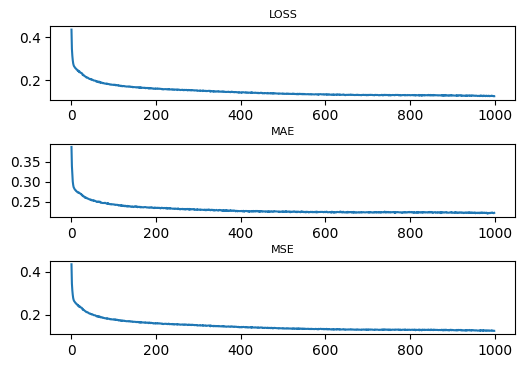

In [49]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

ax=fig.add_subplot(3,1,1)
ax.set_title('LOSS',fontsize=8)
plt.plot(hist1_df.loss)


ax=fig.add_subplot(3,1,2)
ax.set_title('MAE',fontsize=8)
plt.plot(hist1_df.mae)


ax=fig.add_subplot(3,1,3)
ax.set_title('MSE',fontsize=8)
plt.plot(hist1_df.mse)


In [50]:
metrics_1 = model_1.evaluate(X_test,Y_test)
print(f"Loss = {metrics_1[0]}")
print(f"MAE = {metrics_1[1]}")
print(f"MSE = {metrics_1[2]}")
print(f"MAPE = {metrics_1[3]}")

123/123 [==============================] - 0s 2ms/step - loss: 0.2175 - mae: 0.2586 - mse: 0.2175 - mape: 163.5935
Loss = 0.21752697229385376
MAE = 0.25856566429138184
MSE = 0.21752697229385376
MAPE = 163.59347534179688


In [51]:
predict_1 = model_1.predict(X_test).flatten()

123/123 [==============================] - 0s 2ms/step


### Análise de Resíduos

In [52]:
residuos_1 = Y_test['price']-predict_1

Text(0.5, 0, 'Previsão')

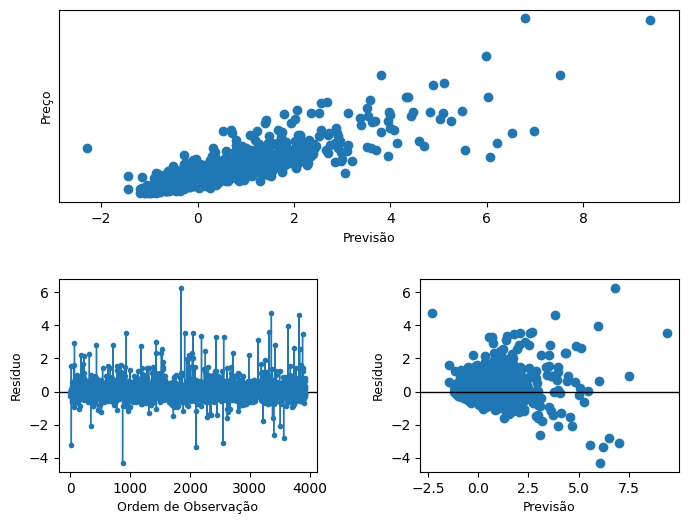

In [54]:
fig=plt.figure(figsize=(8,6))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)

plt. axhline(y=0,xmin=0,xmax=len(residuos_1),color='black', linewidth=1)
plt.plot(range(len(residuos_1)),residuos_1,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,1,1)

plt.scatter(predict_1,Y_test['price'])
plt.yticks([])
plt.ylabel('Preço', fontsize=9)
plt.xlabel('Previsão',fontsize=9)



ax=fig.add_subplot(2,2,4)

plt.scatter(predict_1,residuos_1)
plt.axhline(y=0,xmin=0,xmax=len(predict_1),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

### Previsões

In [55]:
m.r2_score(Y_test['price'],predict_1)

0.7864525862170267

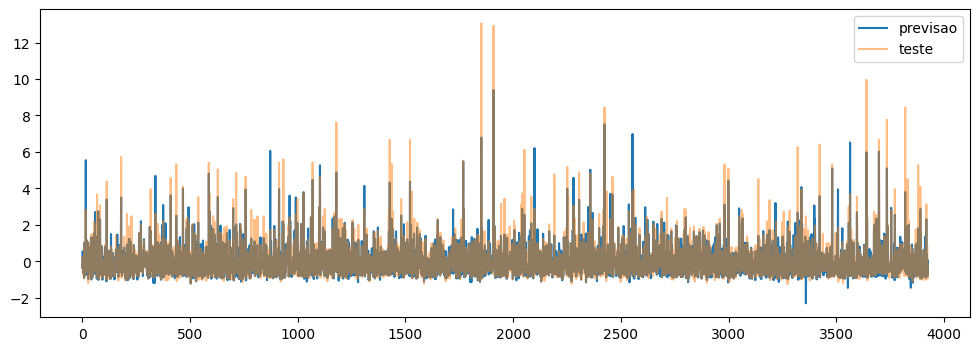

In [56]:
ig=plt.figure(figsize=(12,4))
plt.plot(range(len(predict_1)),predict_1,label='previsao')
plt.plot(range(len(Y_test)),Y_test['price'],alpha=0.5,label='teste')
plt.legend()

## Modelo 2

In [58]:
X.drop([f'dia-{i}' for i in range(1,8)],
  axis='columns', inplace=True)

In [59]:
X

,floors,bathrooms,grade,condition,bedrooms,sqft_living,lat,sqft_living15,zipcode,sqft_above,tendencia,dia 0,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6
0,-0.810987,1.708263,0.290914,0.907569,-0.395404,0.186224,1.439427,0.150762,-0.017427,0.155193,0.554439,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.810987,0.342794,-0.558206,0.907569,-0.395404,0.138605,-1.814302,0.266328,-1.028847,0.142357,0.554439,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.810987,0.342794,1.140035,-0.632724,0.681056,0.181973,1.476310,0.411662,-0.017427,0.249708,0.554439,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.814625,0.342794,0.290914,-0.632724,-0.395404,0.090306,1.203660,0.182105,0.881613,0.123921,0.554439,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.001819,0.342794,0.290914,-0.632724,0.681056,0.235544,-1.593722,0.296095,-1.272337,0.323221,0.554439,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,1.001819,0.342794,-0.558206,-0.632724,0.681056,0.147109,-1.150394,0.296095,-0.879007,0.201867,0.003795,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19622,-0.810987,-1.022676,-0.558206,-0.632724,-0.395404,0.136905,0.906420,0.259324,0.469553,0.117853,0.003795,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19623,-0.810987,-1.022676,-0.558206,-0.632724,-0.395404,0.074830,-0.662226,0.287340,2.061602,0.102684,0.003795,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19624,1.001819,0.342794,0.290914,-0.632724,-1.471863,0.091837,1.049616,0.170023,1.031453,0.092182,0.003795,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
X_train,X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
Y_train,Y_test = Y[:int(len(Y)*0.8)], Y[int(len(Y)*0.8):]

In [61]:
model_2 = keras.Sequential([
    keras.layers.Dense(13,activation='elu',input_shape=[len(X_train.columns)]),
    keras.layers.Dense(13,activation='elu'),
    keras.layers.Dense(1)
])

In [62]:
optimizer = keras.optimizers.RMSprop(0.1,)
model_2.compile(
    loss='mse',
    metrics=['mae','mse','mape']
)

In [63]:
history_2 = model_2.fit(
    x=X_train,
    y=Y_train,
    epochs = 1000,
    verbose = 0
)

In [64]:
hist2_df = pd.DataFrame(history_2.history)

### Métricas

([<matplotlib.axis.XTick at 0x7a0aaaaf2650>,
 [Text(0, 0, '0'), Text(100, 0, '100')])

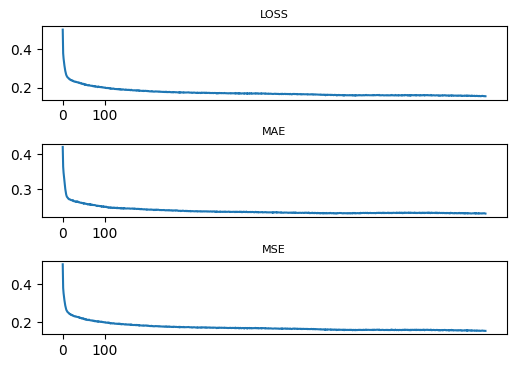

In [65]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

ax=fig.add_subplot(3,1,1)
ax.set_title('LOSS',fontsize=8)
plt.plot(hist2_df.loss)
plt.xticks([0,100])

ax=fig.add_subplot(3,1,2)
ax.set_title('MAE',fontsize=8)
plt.plot(hist2_df.mae)
plt.xticks([0,100])

ax=fig.add_subplot(3,1,3)
ax.set_title('MSE',fontsize=8)
plt.plot(hist2_df.mse)
plt.xticks([0,100])

In [66]:
metrics_2 = model_2.evaluate(X_test,Y_test)
print(f"Loss = {metrics_2[0]}")
print(f"MAE = {metrics_2[1]}")
print(f"MSE = {metrics_2[2]}")
print(f"MAPE = {metrics_2[3]}")

123/123 [==============================] - 0s 2ms/step - loss: 0.2210 - mae: 0.2599 - mse: 0.2210 - mape: 154.6129
Loss = 0.22103723883628845
MAE = 0.25994107127189636
MSE = 0.22103723883628845
MAPE = 154.61288452148438


In [67]:
predict_2 = model_2.predict(X_test).flatten()

123/123 [==============================] - 0s 1ms/step


### Análise de Resíduos

In [68]:
residuos_2 = Y_test['price']-predict_2

Text(0.5, 0, 'Previsão')

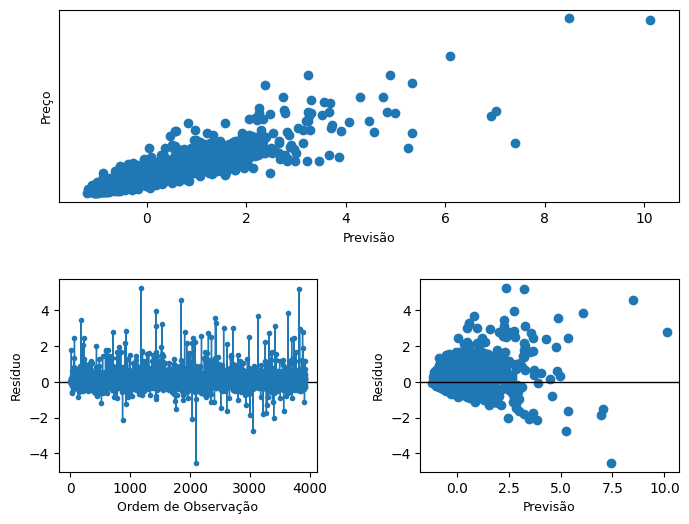

In [69]:
fig=plt.figure(figsize=(8,6))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)

plt. axhline(y=0,xmin=0,xmax=len(residuos_2),color='black', linewidth=1)
plt.plot(range(len(residuos_2)),residuos_2,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,1,1)

plt.scatter(predict_2,Y_test['price'])
plt.yticks([])
plt.ylabel([], fontsize=0)
plt.ylabel('Preço', fontsize=9)
plt.xlabel('Previsão',fontsize=9)



ax=fig.add_subplot(2,2,4)

plt.scatter(predict_2,residuos_2)
plt.axhline(y=0,xmin=0,xmax=len(predict_2),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

### Previsões

In [70]:
m.r2_score(Y_test['price'],predict_2)

0.7830064076560812

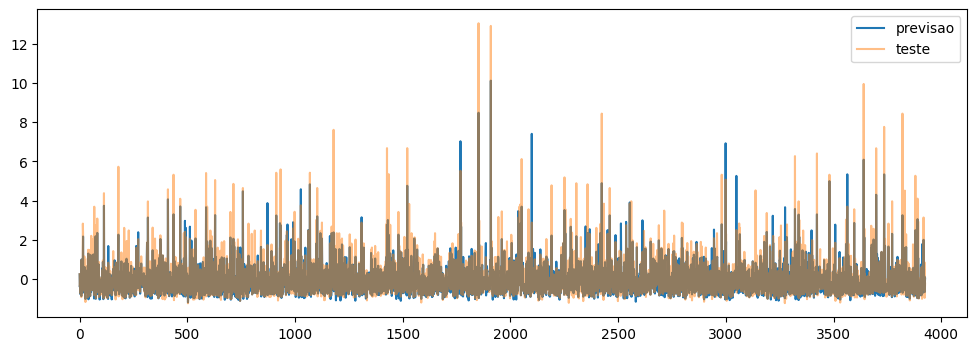

In [71]:
ig=plt.figure(figsize=(12,4))
plt.plot(range(len(predict_2)),predict_2,label='previsao')
plt.plot(range(len(Y_test)),Y_test['price'],alpha=0.5,label='teste')
plt.legend()

## Modelo 3

In [73]:
X.drop([f'dia {i}' for i in range(7)]+['tendencia'],
  axis='columns', inplace=True)

In [75]:
X

,floors,bathrooms,grade,condition,bedrooms,sqft_living,lat,sqft_living15,zipcode,sqft_above
0,-0.810987,1.708263,0.290914,0.907569,-0.395404,0.186224,1.439427,0.150762,-0.017427,0.155193
1,-0.810987,0.342794,-0.558206,0.907569,-0.395404,0.138605,-1.814302,0.266328,-1.028847,0.142357
2,-0.810987,0.342794,1.140035,-0.632724,0.681056,0.181973,1.476310,0.411662,-0.017427,0.249708
3,2.814625,0.342794,0.290914,-0.632724,-0.395404,0.090306,1.203660,0.182105,0.881613,0.123921
4,1.001819,0.342794,0.290914,-0.632724,0.681056,0.235544,-1.593722,0.296095,-1.272337,0.323221
...,...,...,...,...,...,...,...,...,...,...
19621,1.001819,0.342794,-0.558206,-0.632724,0.681056,0.147109,-1.150394,0.296095,-0.879007,0.201867
19622,-0.810987,-1.022676,-0.558206,-0.632724,-0.395404,0.136905,0.906420,0.259324,0.469553,0.117853
19623,-0.810987,-1.022676,-0.558206,-0.632724,-0.395404,0.074830,-0.662226,0.287340,2.061602,0.102684
19624,1.001819,0.342794,0.290914,-0.632724,-1.471863,0.091837,1.049616,0.170023,1.031453,0.092182


In [76]:
X_train,X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
Y_train,Y_test = Y[:int(len(Y)*0.8)], Y[int(len(Y)*0.8):]

In [77]:
model_3 = keras.Sequential([
    keras.layers.Dense(13,activation='elu',input_shape=[len(X_train.columns)]),
    keras.layers.Dense(13,activation='elu'),
    keras.layers.Dense(1)
])

In [78]:
optimizer = keras.optimizers.RMSprop(0.1,)
model_3.compile(
    loss='mse',
    metrics=['mae','mse','mape']
)

In [79]:
history_3 = model_3.fit(
    x=X_train,
    y=Y_train,
    epochs = 1000,
    verbose = 0
)

In [80]:
hist3_df = pd.DataFrame(history_3.history)

### Métricas

([<matplotlib.axis.XTick at 0x7a0aacbe9750>,
 [Text(0, 0, '0'), Text(100, 0, '100')])

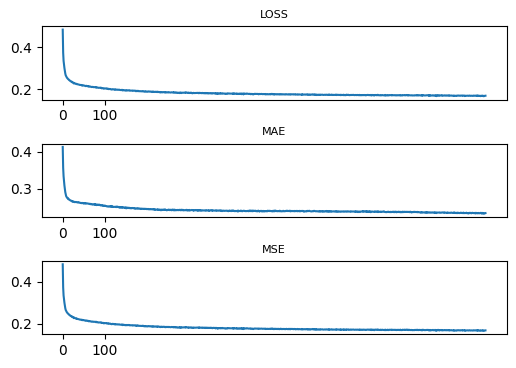

In [81]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

ax=fig.add_subplot(3,1,1)
ax.set_title('LOSS',fontsize=8)
plt.plot(hist3_df.loss)
plt.xticks([0,100])

ax=fig.add_subplot(3,1,2)
ax.set_title('MAE',fontsize=8)
plt.plot(hist3_df.mae)
plt.xticks([0,100])

ax=fig.add_subplot(3,1,3)
ax.set_title('MSE',fontsize=8)
plt.plot(hist3_df.mse)
plt.xticks([0,100])

In [82]:
metrics_3 = model_3.evaluate(X_test,Y_test)
print(f"Loss = {metrics_3[0]}")
print(f"MAE = {metrics_3[1]}")
print(f"MSE = {metrics_3[2]}")
print(f"MAPE = {metrics_3[3]}")

123/123 [==============================] - 0s 2ms/step - loss: 0.2271 - mae: 0.2686 - mse: 0.2271 - mape: 157.9955
Loss = 0.22713136672973633
MAE = 0.26864880323410034
MSE = 0.22713136672973633
MAPE = 157.99546813964844


In [83]:
predict_3 = model_3.predict(X_test).flatten()

123/123 [==============================] - 0s 1ms/step


In [84]:
residuos_3 = Y_test['price']-predict_3

### Análise de Resíduos

Text(0.5, 0, 'Previsão')

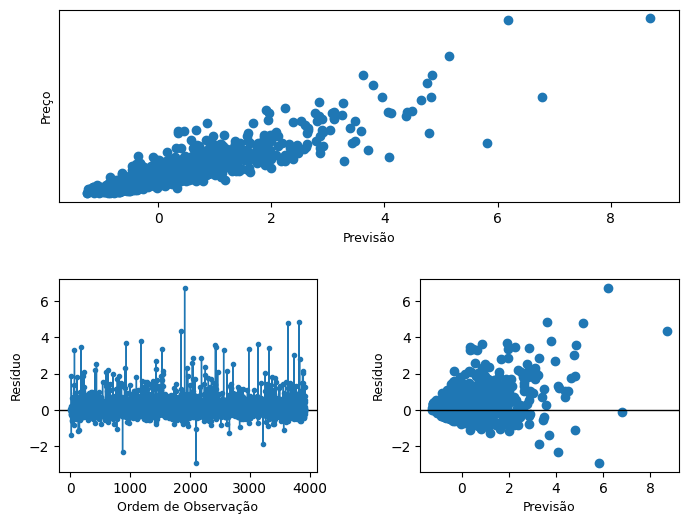

In [85]:
fig=plt.figure(figsize=(8,6))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)

plt. axhline(y=0,xmin=0,xmax=len(residuos_3),color='black', linewidth=1)
plt.plot(range(len(residuos_3)),residuos_3,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,1,1)

plt.scatter(predict_3,Y_test['price'])
plt.yticks([])
plt.ylabel([], fontsize=0)
plt.ylabel('Preço', fontsize=9)
plt.xlabel('Previsão',fontsize=9)



ax=fig.add_subplot(2,2,4)

plt.scatter(predict_3,residuos_3)
plt.axhline(y=0,xmin=0,xmax=len(predict_3),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

### Previsões

In [86]:
m.r2_score(Y_test['price'],predict_3)

0.7770238143002941

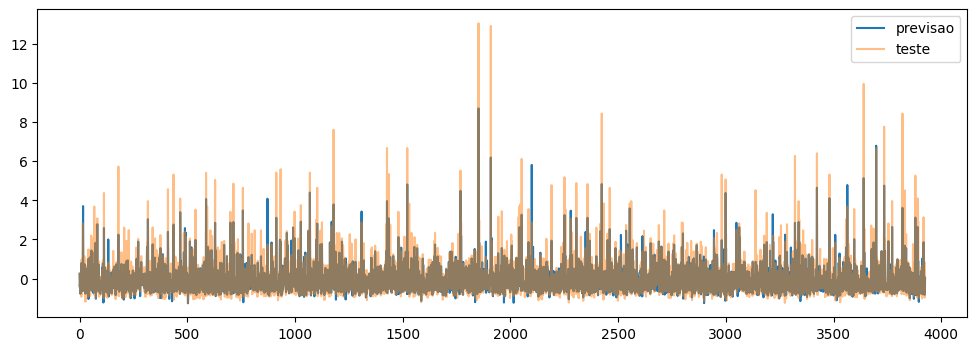

In [87]:
ig=plt.figure(figsize=(12,4))
plt.plot(range(len(predict_3)),predict_3,label='previsao')
plt.plot(range(len(Y_test)),Y_test['price'],alpha=0.5,label='teste')
plt.legend()

# Conclusão

Por enquanto não teve uma comparação muito embasada a partir do k-fold

Não houve diferença significativa entre os modelos, portanto é preferível o modelo mais simples com menos features

O faturamento diário realmente não afeta os preços